In [2]:
import pandas as pd
import os

#### Merging 12 months of sales data into 1 file and making it into a csv file so we dont keep re-running

In [3]:
"""
df = pd.read_csv('./Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/Sales_April_2019.csv')

files=[file for file in os.listdir('./Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data')]

dflist=[]
for file in files:
    df = pd.read_csv('./Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/'+file)
    dflist.append(df)
alldata=pd.concat(dflist)
alldata.head()
"""

"\ndf = pd.read_csv('./Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/Sales_April_2019.csv')\n\nfiles=[file for file in os.listdir('./Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data')]\n\ndflist=[]\nfor file in files:\n    df = pd.read_csv('./Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/'+file)\n    dflist.append(df)\nalldata=pd.concat(dflist)\nalldata.head()\n"

In [4]:
#alldata.to_csv("alldata.csv",index=False)

In [5]:
df=pd.read_csv('./alldata.csv')

In [6]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

### Dropping NaN values because that is why everything is an object

In [7]:
df.dropna(inplace=True)
df[df.isna().any(1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


### Below cell is to identify problem rows that do not let me change data types because of the 'Or' and then removing those rows

In [8]:
df[df["Quantity Ordered"]=="Quantity Ordered"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [9]:
df=df[df["Quantity Ordered"]!="Quantity Ordered"]

#### reindexing the dataframe

In [10]:
df.reset_index(drop=True,inplace=True)

#### Add extra columns

In [11]:
df=df.astype({"Quantity Ordered" : "int32","Price Each":"float64"})
#you can also use df["Quantity Ordered"]=pd.to_numeric(df["Quantity Ordered"])
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [12]:
df["Sales"] = df["Quantity Ordered"]*df["Price Each"]
df["Month"] = df["Order Date"].str[0:2]
df["Month"]=pd.to_numeric(df["Month"])

#### Question 1: Which was the best month for sales? How much was earned in that month?

In [13]:
months=list(range(1,13,1))
#months
monthlysales=[]
for month in months:
    x=df[df.loc[:,"Month"]==month]["Sales"].sum()
    monthlysales.append(x)

In [14]:
monthlysales

[1822256.73,
 2202022.42,
 2807100.38,
 3390670.2399999993,
 3152606.7499999995,
 2577802.26,
 2647775.76,
 2244467.88,
 2097560.13,
 3736726.8799999994,
 3199603.1999999997,
 4613443.34]

In [15]:
print(monthlysales.index(max(monthlysales))+1,"th month is the best month for sales.\n$",max(monthlysales),
      " was earned that month.",sep="")

12th month is the best month for sales.
$4613443.34 was earned that month.


#### Alternatively you can group by category like SQL

In [16]:
monthly_sales=df.loc[:,["Sales","Month"]].groupby('Month').sum()

In [17]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter



C:\Users\nagul\AppData\Local\Temp\ipykernel_30832\705336708.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
C:\Users\nagul\AppData\Local\Temp\ipykernel_30832\705336708.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


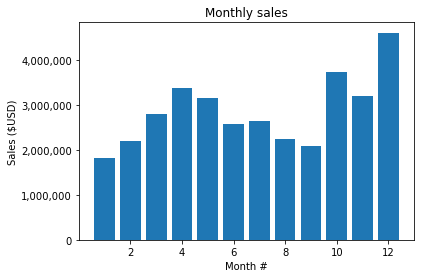

In [18]:
#plt.rcParams['axes.formatter.useoffset'] = False



month=list(range(1,13,1))
plt.bar(months,monthly_sales["Sales"])

current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others

plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
current_values = plt.gca().get_yticks()

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.ylabel('Sales ($USD)')
plt.xlabel('Month #')
plt.title("Monthly sales")

#plt.get_yaxis().get_major_formatter().set_useOffset(False)

plt.show()



#### Question 2: What city had the highest number of sales?

#### method1 is using usaddress library

In [19]:
#pip install usaddress

In [20]:
import usaddress
from collections import OrderedDict

In [21]:
trialdic=usaddress.tag(df.loc[1,"Purchase Address"])
trialdic

(OrderedDict([('AddressNumber', '682'),
              ('StreetName', 'Chestnut'),
              ('StreetNamePostType', 'St'),
              ('PlaceName', 'Boston'),
              ('StateName', 'MA'),
              ('ZipCode', '02215')]),
 'Street Address')

In [22]:
def cityName(address):
    dic=usaddress.tag(address)
    return dic[0].get('PlaceName')

In [23]:
df['City']=df['Purchase Address'].apply(cityName)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles


In [24]:
CitySales=df.loc[:,["City","Sales"]].groupby('City').sum()

In [25]:
CitySales[CitySales["Sales"]==max(CitySales["Sales"])]

,Sales
City,
San Francisco,8262203.91


#### So clearly we can see San Francisco has the most sales. Now method2 for same task(we will just see how else to get city)

In [26]:
#just splitting the string to retrieve data
df["CityState"]=df["Purchase Address"].apply(lambda x: x.split(',')[1] + ', ' + x.split(' ')[-2])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,CityState
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,Dallas,"Dallas, TX"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston,"Boston, MA"
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles,"Los Angeles, CA"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles,"Los Angeles, CA"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles,"Los Angeles, CA"


In [27]:
CitySales_2=df.groupby('CityState').sum()
CitySales_2.loc[CitySales_2["Sales"]==max(CitySales_2["Sales"]),"Sales"]

CityState
 San Francisco, CA    8262203.91
Name: Sales, dtype: float64

C:\Users\nagul\AppData\Local\Temp\ipykernel_30832\2451539335.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
C:\Users\nagul\AppData\Local\Temp\ipykernel_30832\2451539335.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


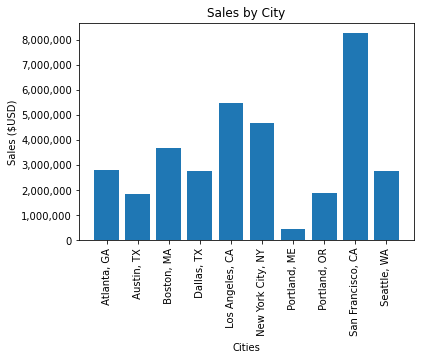

In [28]:

plt.bar(CitySales_2.index,CitySales_2["Sales"])

current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others

plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
current_values = plt.gca().get_yticks()

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
ax=plt.gca()

plt.xticks(CitySales_2.index,rotation='vertical')
plt.ylabel('Sales ($USD)')
plt.xlabel('Cities')
plt.title("Sales by City")

plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [29]:
#manually specifying  pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M') is much faster
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [30]:
#retrieved just the hour of a date and put it into a column
df['Hour']=df['Order Date'].dt.hour
df['Minute']=df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,CityState,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas,"Dallas, TX",8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston,"Boston, MA",22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles,"Los Angeles, CA",14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles,"Los Angeles, CA",14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles,"Los Angeles, CA",9,27


In [31]:
#getting the number of transactions per hour
hourly_data = df.loc[:,['Sales','Hour']].groupby('Hour').count()
hourly_data = hourly_data.rename({'Sales': 'CountOfSales'}, axis=1)
hourly_data.head()

,CountOfSales
Hour,
0,3910
1,2350
2,1243
3,831
4,854


#### Below chart shows it may be good to advertise just before peak buying, so around 10am and 6pm

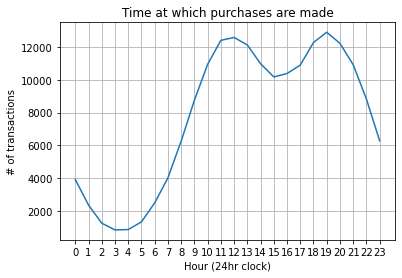

In [32]:


plt.plot(hourly_data.index,hourly_data['CountOfSales'])
plt.xticks(hourly_data.index)
plt.xlabel('Hour (24hr clock)')
plt.ylabel('# of transactions')
plt.grid()
plt.title('Time at which purchases are made')
plt.show()


#### Question 4: Products often sold together?

In [33]:
#likely a good approach to start by grouping with orderid
#we can see there is obviously orders with more than 1 item
df.groupby('Order ID').count()["Product"][df.groupby('Order ID').count()["Product"]>1]


Order ID
141275    2
141290    2
141365    2
141384    2
141450    2
         ..
319536    2
319556    2
319584    2
319596    2
319631    2
Name: Product, Length: 7136, dtype: int64

In [34]:
#types of products sold
df.Product.unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [48]:
#this below code is to only include orders that have more than one product, we then reset index
dfd = df[df['Order ID'].duplicated(keep=False)]

In [49]:
#group by order id and join the products, we then drop other columns as they will be inaccurate. 
#once we only have order id and grouped we can drop duplicates and reset index.
dfd['Grouped']=dfd.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
dfd=dfd[['Order ID','Grouped']].drop_duplicates()
dfd.reset_index(drop=True,inplace=True)
dfd.head()

C:\Users\nagul\AppData\Local\Temp\ipykernel_30832\2488396624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd['Grouped']=dfd.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
0,176560,"Google Phone,Wired Headphones"
1,176574,"Google Phone,USB-C Charging Cable"
2,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176586,"AAA Batteries (4-pack),Google Phone"
4,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [93]:
# referenced from https://stackoverflow.com/questions/10844556/python-counting-frequency-of-pairs-of-elements-in-a-list-of-lists

from itertools import combinations
from collections import Counter

count=Counter()

for row in dfd['Grouped']:
    row_list=row.split(',')

    count.update(Counter(combinations(row_list,2)))
    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

#### What product sold the most?

In [98]:
'''
count_ind = Counter()
for row in dfd['Grouped']:
    row_list=row.split(',')

    count_ind.update(Counter(row_list))
    
count_ind.most_common(10)
'''

[('USB-C Charging Cable', 2111),
 ('iPhone', 1867),
 ('Lightning Charging Cable', 1827),
 ('Wired Headphones', 1674),
 ('Google Phone', 1639),
 ('Apple Airpods Headphones', 974),
 ('Bose SoundSport Headphones', 820),
 ('AAA Batteries (4-pack)', 815),
 ('AA Batteries (4-pack)', 768),
 ('Vareebadd Phone', 601)]

In [109]:
product_group = df.groupby('Product')
quantity_ordered=product_group.sum()

In [110]:
quantity_ordered

,Quantity Ordered,Price Each,Sales,Month,Hour,Minute
Product,,,,,,
20in Monitor,4129,451068.99,454148.71,29336,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,2435097.56,44440,90916,184331
27in FHD Monitor,7550,1125974.93,1132424.50,52558,107540,219948
34in Ultrawide Monitor,6199,2348718.19,2355558.01,43304,89076,183480
AA Batteries (4-pack),27635,79015.68,106118.40,145558,298342,609039
AAA Batteries (4-pack),31017,61716.59,92740.83,146370,297332,612113
Apple Airpods Headphones,15661,2332350.00,2349150.00,109477,223304,455570
Bose SoundSport Headphones,13457,1332366.75,1345565.43,94113,192445,392603
Flatscreen TV,4819,1440000.00,1445700.00,34224,68815,142789


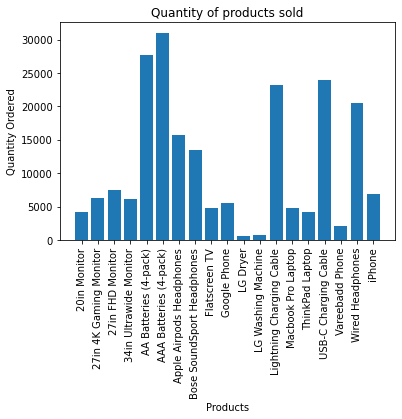

In [113]:
plt.bar(quantity_ordered.index,quantity_ordered['Quantity Ordered'])
plt.xticks(quantity_ordered.index,rotation='vertical')
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.title('Quantity of products sold')
plt.order()
plt.show()

C:\Users\nagul\AppData\Local\Temp\ipykernel_30832\4258251226.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(quantity_ordered.index,rotation='vertical',size=8)


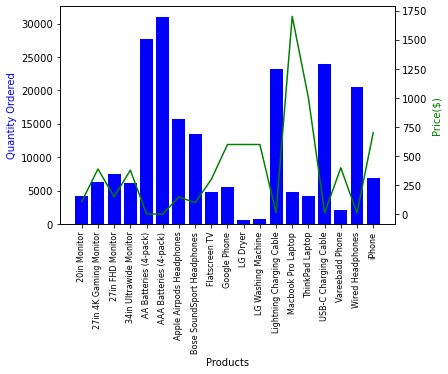

In [131]:
prices = df.groupby('Product').mean()['Price Each']
#print(prices)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(quantity_ordered.index,quantity_ordered['Quantity Ordered'],color='b')
ax2.plot(quantity_ordered.index,prices,'g-')
#plt.xticks(quantity_ordered.index,rotation='vertical')

ax1.set_xlabel('Products')

ax1.set_ylabel('Quantity Ordered',color='b')
ax2.set_ylabel('Price($)',color='g')
ax1.set_xticklabels(quantity_ordered.index,rotation='vertical',size=8)
plt.show()











